## Quiz #0701

### "TensorFlow machine learning with Calilfornia housing data"

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
#import tensorflow as tf
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')    # Turn the warnings off.

In [14]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

#### Answer the following question by providing Python code:

In [3]:
# Bring the data.
housing_data = fetch_california_housing()

In [4]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

1). Explore the data:
- Display the dataset as a DataFrame with column labels.

In [77]:
X=housing_data.data
Y=housing_data.target
df=pd.DataFrame(X,columns=housing_data.feature_names)
df['Target']=Y
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.



---
**Preprocessing** 
* all features are numeric variables
* there are no missing values






In [ ]:
#scaling
X_scaled=scale(X)
#pd.DataFrame(X_scaled)

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2)

In [15]:
X_train.shape

(16512, 8)



---


**Linear Regression**

Weights : W (initialized with zeros) and b (intialized with ones)

In [36]:
W=tf.Variable(tf.zeros((X_train.shape[1],1)))
b=tf.Variable(1.0)

X and Y

In [37]:
X_ph = tf.placeholder(tf.float32, shape=X_train.shape)                # We don't need to fix the number of observations.
Y_ph = tf.placeholder(tf.float32, shape=Y_train.shape)

model : 

In [38]:
Y_model=tf.add(tf.matmul(X_ph, W), b)

loss function and optimizer

In [43]:
loss = tf.reduce_mean(tf.squared_difference(Y_model, Y_ph)) # L2 loss.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)


Training the model

In [47]:
n_epochs = 60                                       # N# of epochs (gradient descent steps).
train = optimizer.minimize(loss)                                          # Define training. Use optimizer.minimize(loss)
init = tf.global_variables_initializer()                       # Define Variable initialization.
                                                      #Returns an Op that initializes global variablestf.global_variables_initializer().
with tf.Session() as sess:
        # Variables initialization.
        sess.run(init)
        # Training.
        my_feed = {X_ph:X_train, Y_ph:Y_train}        
        
        for i in range(n_epochs):
                 
            sess.run(train, feed_dict = my_feed)
        W_model, b_model = sess.run([W, b])                   # Get the final values of the Variables.
        # Testing.
        
        mse_value = sess.run(loss, feed_dict = my_feed)            # Calculate the in-sample MSE.

In [48]:
print("W_model:",W_model)
print("\n b_model:",b_model)

W_model: [[-4.5669982e-05]
 [ 2.2702387e-05]
 [ 2.6857524e-05]
 [ 2.9784551e-05]
 [ 6.6068728e-06]
 [-7.1500202e-05]
 [ 6.9080641e-05]
 [-7.7444987e-05]]

 b_model: 1.0127143




---
**Evaluation**


In-sample MSE

In [49]:
print("MSE  = {:5.3f}".format(mse_value))
print("RMSE = {:5.3f}".format(np.sqrt(mse_value)))

MSE  = 2.439
RMSE = 1.562


Out-of-sample MSE

In [67]:
X_th=tf.placeholder(tf.float32,shape=X_test.shape)
y_model=tf.add(tf.matmul(X_th, W_model), b_model)
Y_th=tf.placeholder(tf.float32,shape=Y_test.shape)

In [68]:
loss = tf.reduce_mean(tf.squared_difference(y_model, Y_th)) # L2 loss.

In [69]:
init = tf.global_variables_initializer()                       # Define Variable initialization.

with tf.Session() as sess:
  sess.run(init)
  my_feed = {X_th:X_test,Y_th:Y_test}
  y_pred_value = sess.run(y_model, feed_dict=my_feed)
  mse_value = sess.run(loss,feed_dict=my_feed)            # Calculate the in-sample MSE.


In [71]:
print('out-of-sample MSE:',mse_value)
print('RMSE:',np.sqrt(mse_value))

out-of-sample MSE: 2.4756382
RMSE: 1.5734161


##Improving the model by feature selection



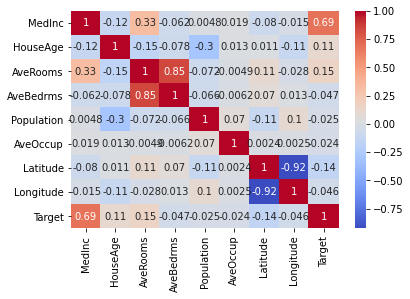

In [72]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [108]:
X_new=df[['MedInc','HouseAge','AveRooms','Latitude','AveBedrms']]
X_new_scaled=scale(X_new)
X_new_train,X_new_test,Y_new_train,Y_new_test=train_test_split(X_new_scaled,Y,test_size=0.2)


In [123]:
W=tf.Variable(tf.zeros((X_new_train.shape[1],1)))
b=tf.Variable(1.0)

X_ph = tf.placeholder(tf.float32, shape=X_new_train.shape)                # We don't need to fix the number of observations.
Y_ph = tf.placeholder(tf.float32, shape=Y_new_train.shape)

Y_model=tf.add(tf.matmul(X_ph, W), b)

loss = tf.reduce_mean(tf.squared_difference(Y_model, Y_ph)) # L2 loss.
optimize=tf.train.MomentumOptimizer(learning_rate = 0.0001, momentum=0.9)

n_epochs = 400                                       # N# of epochs (gradient descent steps).
train = optimizer.minimize(loss)                                          # Define training. Use optimizer.minimize(loss)
init = tf.global_variables_initializer()                       # Define Variable initialization.
                                                      #Returns an Op that initializes global variablestf.global_variables_initializer().
with tf.Session() as sess:
        # Variables initialization.
        sess.run(init)
        # Training.
        my_feed = {X_ph:X_new_train, Y_ph:Y_new_train}        
        
        for i in range(n_epochs):
                 
            sess.run(train, feed_dict = my_feed)
        W_model, b_model = sess.run([W, b])                   # Get the final values of the Variables.
        # Testing.
        
        mse_ = sess.run(loss, feed_dict = my_feed)            # Calculate the in-sample MSE.


In [124]:
print("W_model:",W_model)
print("\n b_model:",b_model)

W_model: [[ 4.2258657e-04]
 [-5.1253497e-05]
 [ 3.6247315e-05]
 [ 4.7042998e-04]
 [-3.0165139e-04]]

 b_model: 1.082632


In [125]:
print("in-sample MSE  = {:5.3f}".format(mse_value))
print("RMSE = {:5.3f}".format(np.sqrt(mse_value)))

in-sample MSE  = 2.274
RMSE = 1.508


In [126]:
X_th=tf.placeholder(tf.float32,shape=X_new_test.shape)
y_model=tf.add(tf.matmul(X_th, W_model), b_model)
Y_th=tf.placeholder(tf.float32,shape=Y_new_test.shape)

In [127]:
loss = tf.reduce_mean(tf.squared_difference(y_model, Y_th)) # L2 loss.

init = tf.global_variables_initializer()                       # Define Variable initialization.

with tf.Session() as sess:
  sess.run(init)
  my_feed = {X_th:X_new_test,Y_th:Y_new_test}
  y_pred_value = sess.run(y_model, feed_dict=my_feed)
  mse_value = sess.run(loss,feed_dict=my_feed)            # Calculate the in-sample MSE.


print('out-of-sample MSE:',mse_value)
print('RMSE:',np.sqrt(mse_value))

out-of-sample MSE: 2.1941116
RMSE: 1.4812534
